In [27]:
import tensorflow as tf
import pandas as pd
print(tf.__version__)
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

1.7.0


In [28]:
# Import data
data = pd.read_csv('/Users/RyanHu/Downloads/AAPL.csv')
data = data.drop(['Date'], 1)
]n = data.shape[0]
p = data.shape[1]
]data = data.values


In [29]:
train_start = 0
train_end = int(np.floor(0.8*n))
test_start = train_end
test_end = n
data_train = data[np.arange(train_start, train_end), :]
data_test = data[np.arange(test_start, test_end), :]


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_train)
data_train = scaler.transform(data_train)
data_test = scaler.transform(data_test)
X_train = data_train[:, 1:]
y_train = data_train[:, 0]
X_test = data_test[:, 1:]
y_test = data_test[:, 0]

In [31]:
import tensorflow as tf

a = tf.placeholder(dtype=tf.int8)
b = tf.placeholder(dtype=tf.int8)

c = tf.add(a, b)

graph = tf.Session()

graph.run(c, feed_dict={a: 5, b: 4})


9

In [32]:
n_stocks = X_train.shape[1]

In [33]:
n_neurons_1 = 1024
n_neurons_2 = 512
n_neurons_3 = 256
n_neurons_4 = 128



In [34]:
net = tf.InteractiveSession()


In [35]:

X = tf.placeholder(dtype=tf.float32, shape=[None, n_stocks])
Y = tf.placeholder(dtype=tf.float32, shape=[None])


In [36]:

sigma = 1
weight_initializer = tf.variance_scaling_initializer(mode="fan_avg", distribution="uniform", scale=sigma)
bias_initializer = tf.zeros_initializer()



In [37]:
W_hidden_1 = tf.Variable(weight_initializer([n_stocks, n_neurons_1]))
bias_hidden_1 = tf.Variable(bias_initializer([n_neurons_1]))
W_hidden_2 = tf.Variable(weight_initializer([n_neurons_1, n_neurons_2]))
bias_hidden_2 = tf.Variable(bias_initializer([n_neurons_2]))
W_hidden_3 = tf.Variable(weight_initializer([n_neurons_2, n_neurons_3]))
bias_hidden_3 = tf.Variable(bias_initializer([n_neurons_3]))
W_hidden_4 = tf.Variable(weight_initializer([n_neurons_3, n_neurons_4]))
bias_hidden_4 = tf.Variable(bias_initializer([n_neurons_4]))

In [38]:
W_out = tf.Variable(weight_initializer([n_neurons_4, 1]))
bias_out = tf.Variable(bias_initializer([1]))



In [39]:
hidden_1 = tf.nn.relu(tf.add(tf.matmul(X, W_hidden_1), bias_hidden_1))
hidden_2 = tf.nn.relu(tf.add(tf.matmul(hidden_1, W_hidden_2), bias_hidden_2))
hidden_3 = tf.nn.relu(tf.add(tf.matmul(hidden_2, W_hidden_3), bias_hidden_3))
hidden_4 = tf.nn.relu(tf.add(tf.matmul(hidden_3, W_hidden_4), bias_hidden_4))

In [40]:
out = tf.transpose(tf.add(tf.matmul(hidden_4, W_out), bias_out))

mse = tf.reduce_mean(tf.squared_difference(out, Y))

opt = tf.train.AdamOptimizer().minimize(mse)

net.run(tf.global_variables_initializer())



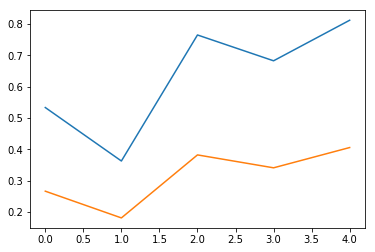

In [26]:
plt.ion()
fig = plt.figure()
ax1 = fig.add_subplot(111)
line1, = ax1.plot(y_test)
line2, = ax1.plot(y_test * 0.5)
plt.show()



The following command must be run outside of the IPython shell:

    $ pip install pandas

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more informations on how to install packages:

    https://docs.python.org/3/installing/
